<a href="https://colab.research.google.com/github/Debojyoti83/Business-Case-Yulu---Hypothesis-Testing/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case: Yulu - Hypothesis Testing**

#**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#**Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

#**Business Problem**

*  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*  How well those variables describe the electric cycle demands

#**Import Libraries**

* Importing the necessary libraies for data analysis and visualization. this libraries include **pandas, numpy, matplotlib.pyplot, seaborn** and **scipy.stats**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

#**Loading The Dataset**
*   Next, load the Yulu dataset using the **pd.read_csv()** function, and named it as yulu.

In [ ]:
!gdown 1xr4ZBnDrtf4vQIiIO1DBNIXik5B6yPm9

Downloading...
From: https://drive.google.com/uc?id=1xr4ZBnDrtf4vQIiIO1DBNIXik5B6yPm9
To: /content/yulu_original_bike_sharing.csv
100% 648k/648k [00:00<00:00, 24.9MB/s]


In [ ]:
yulu_org = pd.read_csv("/content/yulu_original_bike_sharing.csv") # to refer to original dataframe

yulu = pd.read_csv("/content/yulu_original_bike_sharing.csv") # for making changes

**Let's look at the first five records of the dataset to understand its structure.**

In [ ]:
yulu.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#**Concise Summary**
*   Next get a concise summary of the dataset for finding information about total rows, column and about the number of non-null values and data types of each column.

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu.shape

(10886, 12)

In [ ]:
yulu.duplicated().sum()

0

In [ ]:
yulu.isna().sum().sum()

0

***Observations :***

*  There are 10886 rows and 12 columns in the data.
*  There are no null values.
*  There are also no duplicate values.
*  The columns **"datetime"** have object datatype.
*  The columns **"season"**, **"holiday"**, **"workingday"**, **"weather"**, **"humidity"**, **"casual"**, **"registered"** and **"count"** have int datatype.
*  The columns **"temp"**, **"atemp"**, and **"windspeed"** have float datatype.

**Data Type Conversion**
* The data type of datetime should be in datetime format.
* At the same time season, holiday, workingday, weather should in object format as they are categorical in nature

In [ ]:
# Type Conversion

yulu['datetime']= pd.to_datetime(yulu['datetime'])
yulu['season']= yulu['season'].map(str)
yulu['holiday']= yulu['holiday'].map(str)
yulu['workingday']= yulu['workingday'].map(str)
yulu['weather']= yulu['weather'].map(str)

In [ ]:
# Data Mapping

season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
yulu["season"] = yulu["season"].map(lambda x: season_mapping[x])
holiday_mapping = {'0':'no', '1':'yes'}
yulu["holiday"] = yulu["holiday"].map(lambda x: holiday_mapping[x])
working_day_mapping = {'0':'no', '1':'yes'}
yulu["workingday"] = yulu["workingday"].map(lambda x: working_day_mapping[x])
weather_mapping = {'1':'clear', '2':'partly_clear', '3':'rain', '4':'intense'}
yulu["weather"] = yulu["weather"].map(lambda x: weather_mapping[x])

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


#**Descriptive Statistics**
*   It is important to understand the dataset's overall characteristics, using
 **pd.describe()** function. such as **count, mean, standard deviation, minimun,maximun** and **quartiles**.

In [ ]:
yulu.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,winter,no,yes,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


* The dataset has values between 1st Jan 2011 to 19th Dec 2012.
* Max temp was 41 C and max feeling temperature was 45.45 C where as Min temp was 0.82 C and min feeling temperature was 0.76 C.


**Unique Values in each column**

In [ ]:
for i in yulu.columns:
  print(f"# \033[1m {i} \033[0m has \033[1m {yulu[i].nunique()} \033[0m unique values")

#  datetime  has  10886  unique values
#  season  has  4  unique values
#  holiday  has  2  unique values
#  workingday  has  2  unique values
#  weather  has  4  unique values
#  temp  has  49  unique values
#  atemp  has  60  unique values
#  humidity  has  89  unique values
#  windspeed  has  28  unique values
#  casual  has  309  unique values
#  registered  has  731  unique values
#  count  has  822  unique values


#**Visual Analysis :**


**Analysis for Categorical Columns**

In [ ]:
# Extracting year,month and hour from datetime column
yulu["hour"] = yulu["datetime"].dt.hour
yulu["month"] = yulu["datetime"].dt.month
yulu["year"] = yulu["datetime"].dt.year

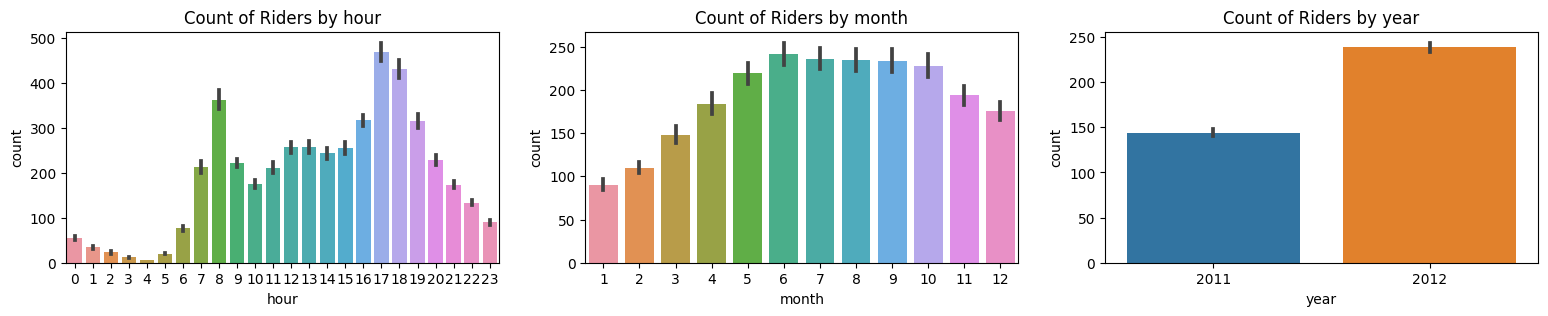

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(19,3))

sns.barplot(data=yulu, x="hour", y="count", ax=axs[0])
axs[0].set_title('Count of Riders by hour')

sns.barplot(data=yulu, x="month", y="count", ax=axs[1])
axs[1].set_title('Count of Riders by month')

sns.barplot(data=yulu, x="year", y="count", ax=axs[2])
axs[2].set_title('Count of Riders by year')

plt.show()

**Insight :**
* It shows that most of the rides are booked during office closing and opening hours
* Most of the rides are booked from June to October
* The number of casual, registered and total riders has increased considerably between 1st Jan 2011 to 19th Dec 2012.

**Univariate Analysis for Categorical Columns**

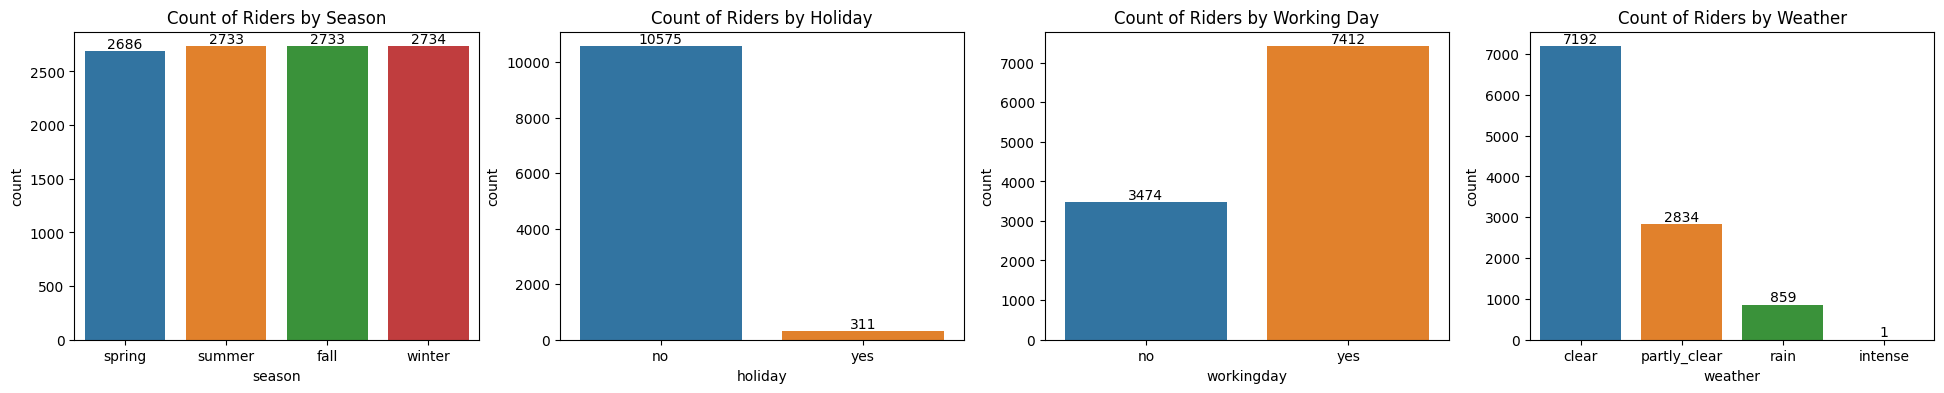

In [ ]:
fig,axes=plt.subplots(nrows=1, ncols=4, figsize=(24,4))

sns.countplot(x='season', data=yulu, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Riders by Season')

sns.countplot(x='holiday', data=yulu, ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Count of Riders by Holiday')

sns.countplot(x='workingday', data=yulu, ax=axes[2])
axes[2].bar_label(axes[2].containers[0])
axes[2].set_title('Count of Riders by Working Day')

sns.countplot(x='weather', data=yulu, ax=axes[3])
axes[3].bar_label(axes[3].containers[0])
axes[3].set_title('Count of Riders by Weather')

plt.show()

**Insights :**

* The number of riders in all seasons is almost the same.
* More number of riders (97% of them) ride on non-holidays as compaired to holidays.
* Nearly 92% of the riders ride on days when the weather is clear or partly clear.

**Univariate Analysis for Continuous Columns**

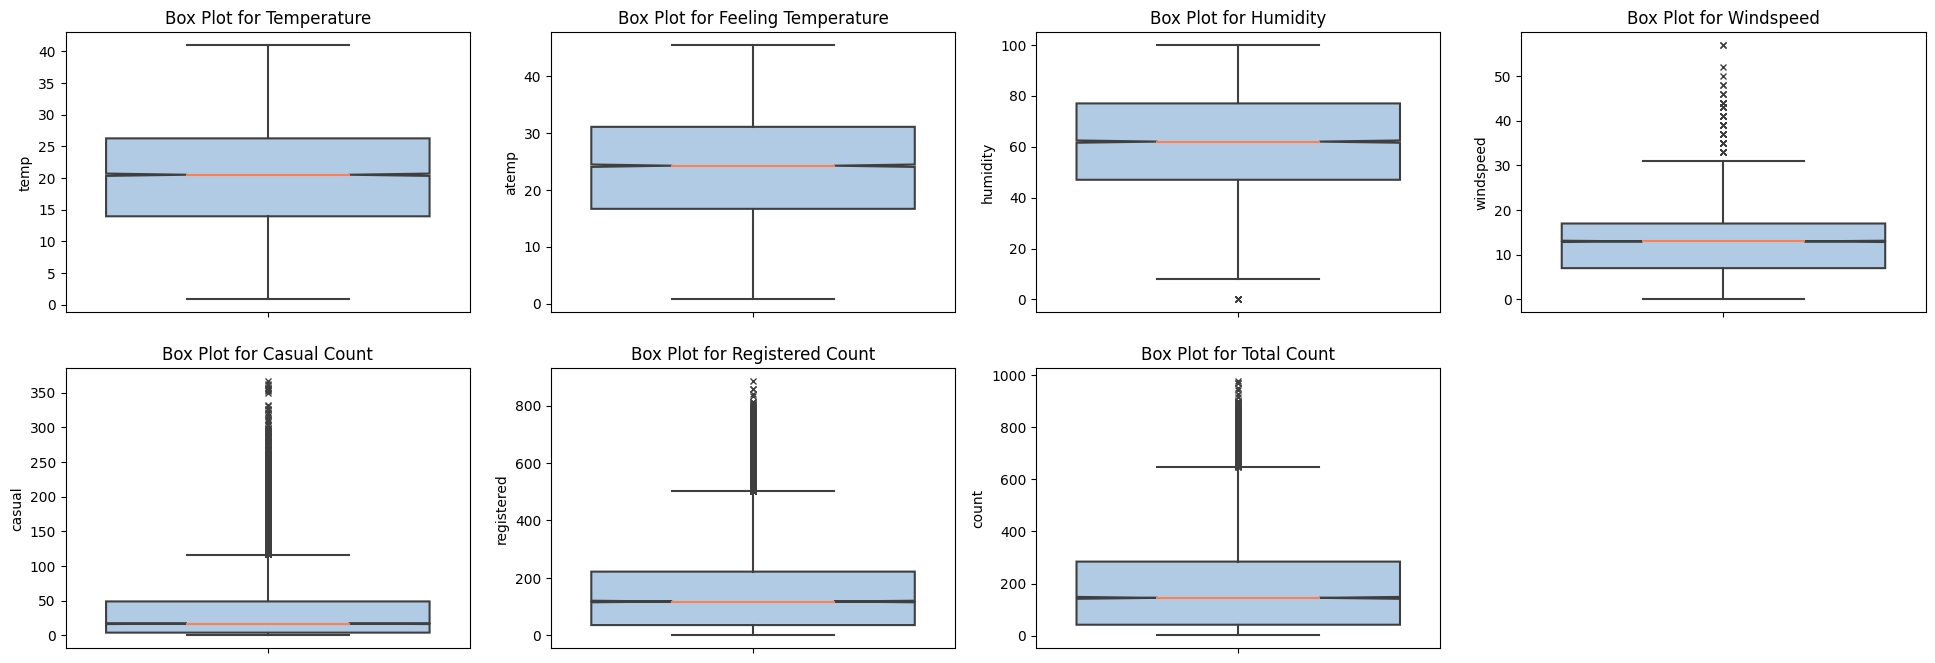

In [ ]:
fig=plt.figure(figsize=(24,8))
plt.subplot(2,4,1)
sns.boxplot(data=yulu, y="temp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
plt.title('Box Plot for Temperature')
plt.subplot(2,4,2)
sns.boxplot(data=yulu, y="atemp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
plt.title('Box Plot for Feeling Temperature')
plt.subplot(2,4,3)
sns.boxplot(data=yulu, y="humidity",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
plt.title('Box Plot for Humidity')
plt.subplot(2,4,4)
sns.boxplot(data=yulu, y="windspeed",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
plt.title('Box Plot for Windspeed')
plt.subplot(2,4,5)
sns.boxplot(data=yulu, y="casual",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
plt.title('Box Plot for Casual Count')
plt.subplot(2,4,6)
sns.boxplot(data=yulu, y="registered",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
plt.title('Box Plot for Registered Count')
plt.subplot(2,4,7)
sns.boxplot(data=yulu, y="count",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
plt.title('Box Plot for Total Count')
plt.show()

**Insights :**
* The mean and the median temperature in the dataset is approximately around 20°C.
* The mean and the median feeling temperature in the dataset is approximately around 24°C.
* The mean and the median humidity in the dataset is approximately around 62%.
* The windspeed is approximately around 13, with large number of outliers.
* There is a large number of outliers for casual, registered and total count of riders between 1st Jan 2011 to 19th Dec 2012. That could be due to the increase in the number of riders over this period. Let us investigate this with the help of time series analysis.

**Bivariate Analysis**
* Increase in Casual, Registered, and Total Riders over time

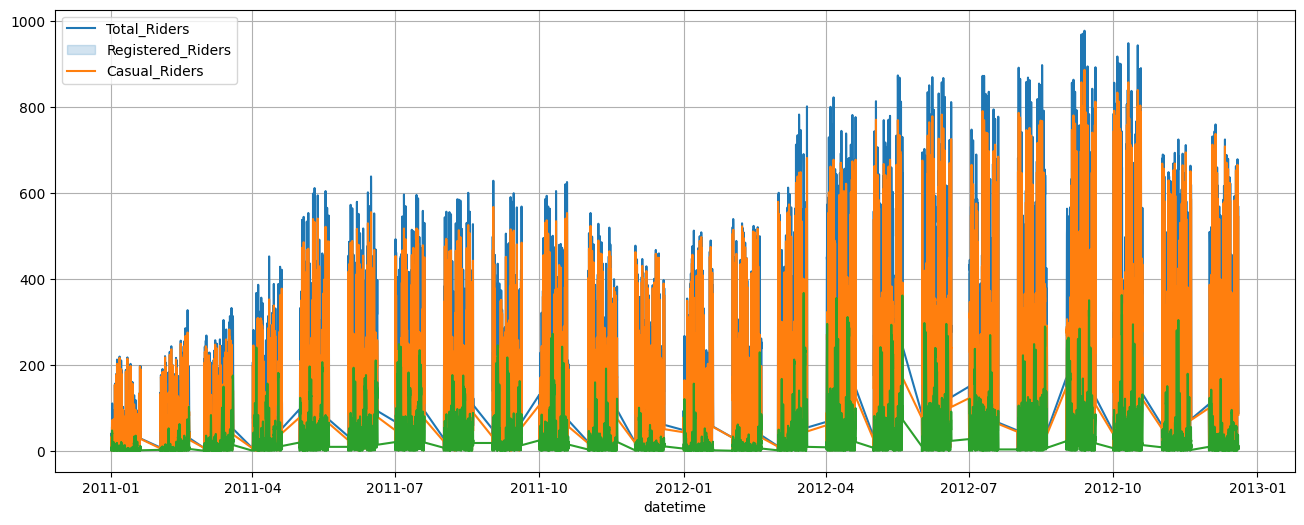

In [ ]:
plt.figure(figsize=(16,6))

sns.color_palette('husl')
sns.lineplot(x = yulu['datetime'],y = yulu['count'].values)
sns.lineplot(x = yulu['datetime'],y = yulu['registered'].values)
sns.lineplot(x = yulu['datetime'],y = yulu['casual'].values)

plt.legend(['Total_Riders','Registered_Riders','Casual_Riders'])

plt.grid()

plt.show()

**Insights :**
* The number of casual, registered and total riders has increased considerably between
1st Jan 2011 to 19th Dec 2012.
* There is also a definite trend and seasonality as we can see increase in number of riders from spring to summer to fall and then a decrease in the number of riders in winter before rising again in spring next season.

**Distribution of Casual, Registered and Total Riders by Season**

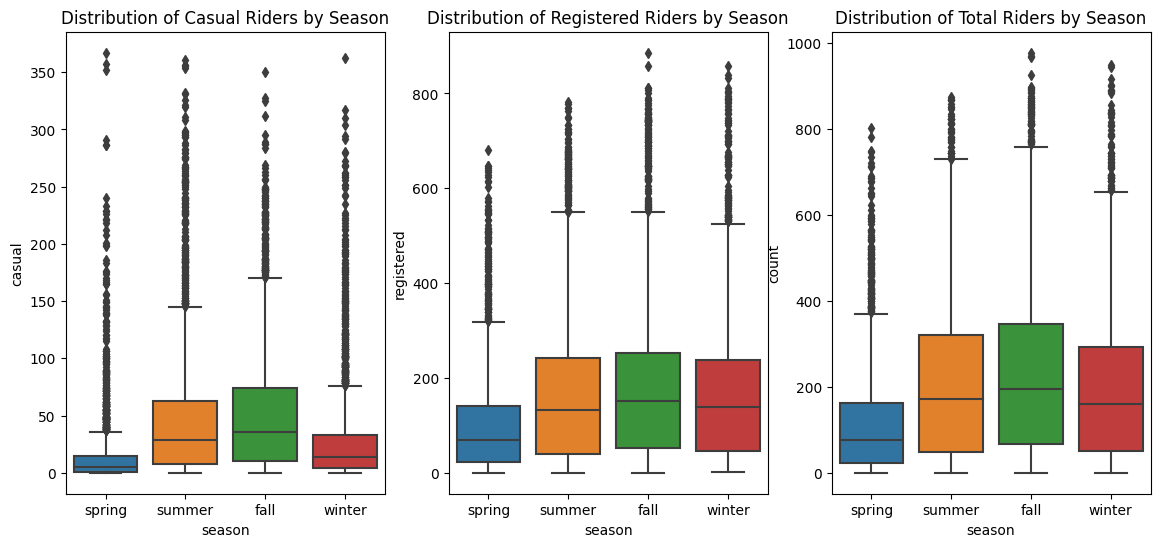

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(14,6))
sns.boxplot(data=yulu, y="casual", x = 'season', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season')
sns.boxplot(data=yulu, y="registered", x = 'season', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season')
sns.boxplot(data=yulu, y="count", x = 'season', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season')
plt.show()

**Insights :**
* The median number of casual, registered and total riders is highest in fall and summer season
followed by winter and spring season.

**Distribution of Casual, Registered and Total Riders by Holiday**

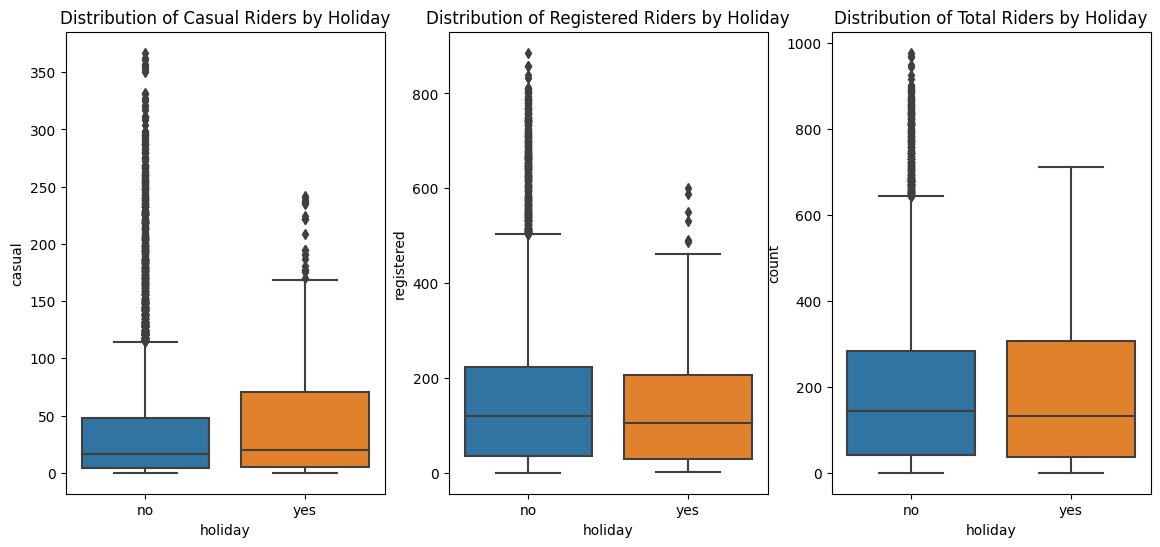

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(14,6))
sns.boxplot(data=yulu, y="casual", x = 'holiday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Holiday')
sns.boxplot(data=yulu, y="registered", x = 'holiday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Holiday')
sns.boxplot(data=yulu, y="count", x = 'holiday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Holiday')
plt.show()

**Insights :**
* The median number of casual, registered and total riders is almost equal irrespective of whether it is a holiday or not.

**Distribution of Casual, Registered and Total Riders by Working Day**

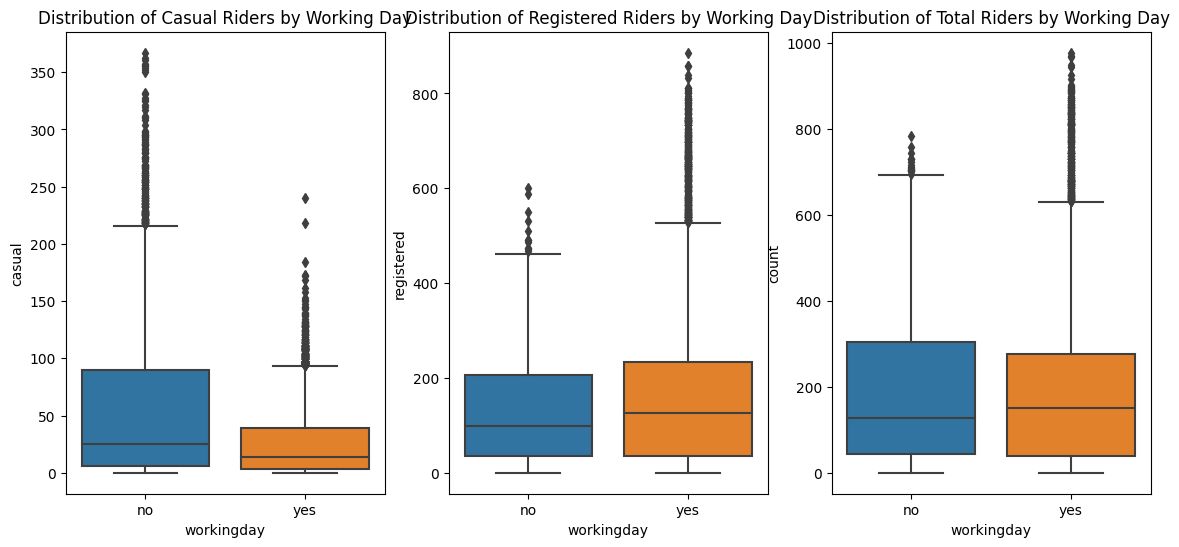

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(14,6))

sns.boxplot(data=yulu, y="casual", x = 'workingday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Working Day')

sns.boxplot(data=yulu, y="registered", x = 'workingday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Working Day')

sns.boxplot(data=yulu, y="count", x = 'workingday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Working Day')

plt.show()

**Insights :**
* The median number of casual, registered and total riders is almost equal irrespective of whether
it is a working day or not.

**Distribution of Casual, Registered and Total Riders by Weather**

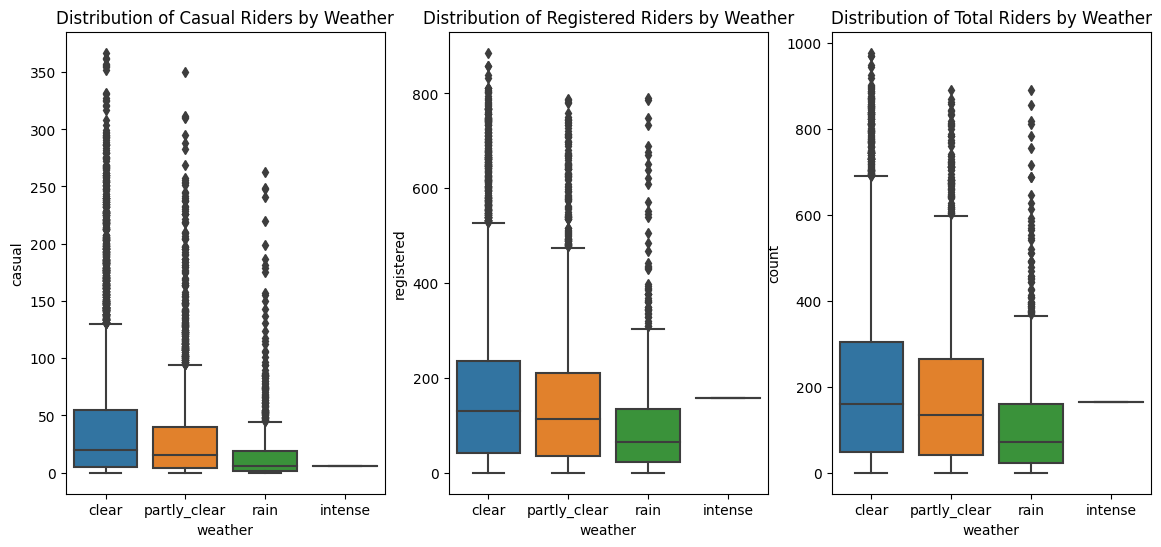

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(14,6))
sns.boxplot(data=yulu, y="casual", x = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Weather')
sns.boxplot(data=yulu, y="registered", x = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Weather')
sns.boxplot(data=yulu, y="count", x = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Weather')
plt.show()

**Insights :**
* The median number of casual, registered and total riders is highest when the weather is clear, followed by the number of casual, registered and total riders when the weather is partly_clear.

**Distribution of Casual, Registered and Total Riders by Weather and Season**

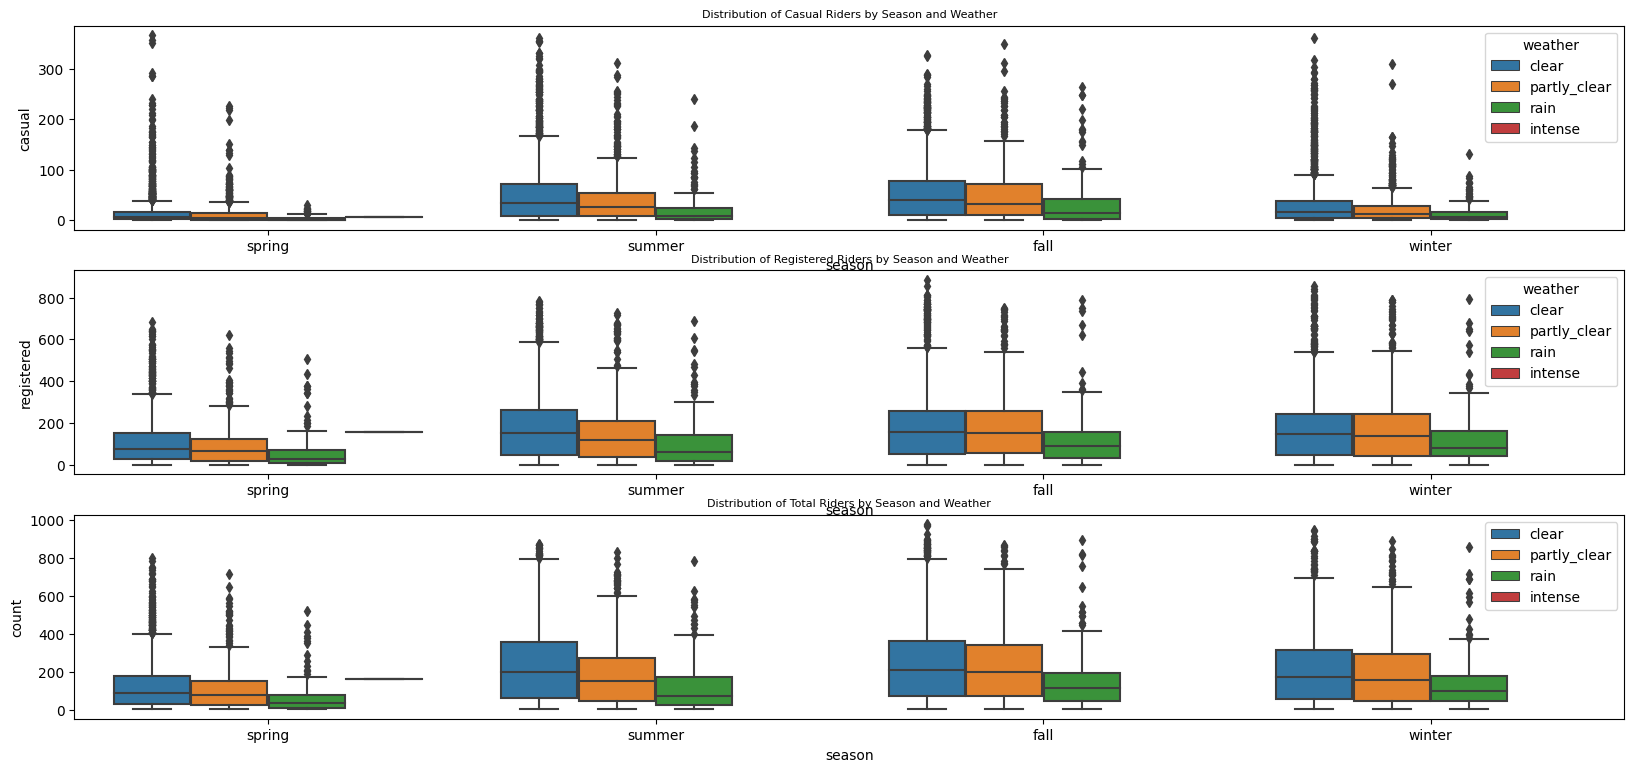

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(20,9))
sns.boxplot(data=yulu, y="casual", x = 'season', hue = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season and Weather',fontsize=8)
sns.boxplot(data=yulu, y="registered", x = 'season', hue = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season and Weather',fontsize=8)
sns.boxplot(data=yulu, y="count", x = 'season', hue = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season and Weather',fontsize=8)
plt.legend(loc='upper right')
plt.show()

**Insights :**
* The number of riders in every season is highest in clear and partly_clear weather

**Correlation among different factors**

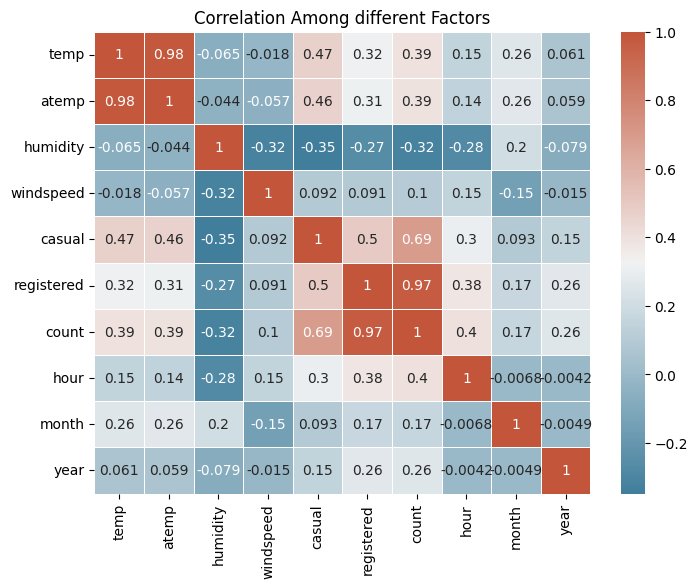

In [ ]:
yulu_corr = yulu.corr()
plt.figure(figsize=(8,6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among different Factors')
sns.heatmap(yulu_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

**Insights :**
* There is a very less correlation between {temperature, feeling temperature, humidity and windspeed}
and {casual, registered and count} variables.
* There is a very strong correlation between temperature and feeling temperature.
* There is a very strong correlation between casual and total riders, as casual riders
contribute to the total number of riders for Yulu.
* There is a very strong correlation between registered and total riders, as registered riders contribute to the total number of riders for Yulu.

#**Hypothesis Testing :**

**1) Effect of working day on number of electric cycles rented**

Let us first set-up the hypothesis framework
* **Ho:** Working Day has no effect on the number of electric cycles rented
* **H1:** Working Day has effect on the number of electric cycles rented
* **Significance Level(alpha):** 0.05 or 5%
* **Test Statistic:** Two Sample T-test



In [ ]:
working_day_no = np.array(yulu[yulu.workingday == 'no']['count'])
working_day_yes = np.array(yulu[yulu.workingday == 'yes']['count'])
T_stat,p_value = stats.ttest_ind(a=working_day_no, b=working_day_yes, equal_var=True)
print("T_stat : ",T_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Working Day has effect on the number of electric cycles rented")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Working Day has no effect on the number of electric cycles rented")

T_stat :  -1.2096277376026694
p_value :  0.22644804226361348
Interpretation : Fail to Reject Ho
Conclusion : Working Day has no effect on the number of electric cycles rented


**Insights :**
* Since, pvalue(0.226) is greater than Significance Level(alpha) i.e 0.05, we fail to reject the
null hypothesis that - working day has no effect on the number of electric cycles rented.
* This implies that at 95% confidence level, the mean of number of riders on non-working day is
statistically not different from the mean number of riders on working day.

**2) Effect of holiday on number of electric cycles rented**

Let us first set-up the hypothesis framework
* **Ho:** Holiday has no effect on the number of electric cycles rented
* **H1:** Holiday has effect on the number of electric cycles rented
* **Significance Level(alpha):** 0.05 or 5%
* **Test Statistic:** Two Sample T-test

In [ ]:
holiday_no = np.array(yulu[yulu.holiday == 'no']['count'])
holiday_yes = np.array(yulu[yulu.holiday == 'yes']['count'])
stats.ttest_ind(a=holiday_no, b=holiday_yes, equal_var=True)
print("T_stat : ",T_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Holiday has effect on the number of electric cycles rented")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Holiday has no effect on the number of electric cycles rented")

T_stat :  -1.2096277376026694
p_value :  0.22644804226361348
Interpretation : Fail to Reject Ho
Conclusion : Holiday has no effect on the number of electric cycles rented


**Insights :**
* Since, pvalue(0.5736) is greater than Significance Level(alpha) i.e 0.05, we fail to reject the
null hypothesis that - holiday has no effect on the number of electric cycles rented.
* This implies that at 95% confidence level, the mean of number of riders on non-holiday is
statistically not different from the mean number of riders on holiday.

**3) Number of cycles rented similar or different in different seasons**

Let us first set-up the hypothesis framework
* **Ho:** Season has no effect on the number of electric cycles rented
* **H1:** Season has an effect on the number of electric cycles rented
* **Significance Level(alpha):** 0.05 or 5%
* **Test Statistic:** One Way ANOVA

In [ ]:
season_spring = np.array(yulu[yulu.season == 'spring']['count'])
season_summer = np.array(yulu[yulu.season == 'summer']['count'])
season_fall = np.array(yulu[yulu.season == 'fall']['count'])
season_winter = np.array(yulu[yulu.season == 'winter']['count'])

In [ ]:
# Let us now calculate,
# The degree of freedom(dfn) for different seasons, and
# The degree of freedom(dfd) for all data points within different seasons
dfn = 3
dfd = len(season_spring) - 1 + len(season_summer) - 1 + len(season_fall) - 1 + len(season_winter) - 1

In [ ]:
# Critical Region at 95% confidence interval
critical_region = stats.f.ppf(0.95, dfn=dfn, dfd=dfd)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6057251036154376


In [ ]:
# Let us now calculate the f-statistic based on data points
f_stat,p_value = stats.f_oneway(season_spring, season_summer, season_fall, season_winter)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Season has an effect on the number of electric cycles rented")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Season has no effect on the number of electric cycles rented")

f_stat :  236.94671081032106
p_value :  6.164843386499654e-149
Interpretation : Reject Ho
Conclusion : Season has an effect on the number of electric cycles rented


**Insights :**
* Since, pvalue(6.164843386499654e-149) is lesser than Significance Level(alpha) i.e 0.05, we reject the
null hypothesis that - season has no effect on the number of electric cycles rented.
* This implies that at 95% confidence level, the mean of number of riders in different seasons is
statistically different for atleast one season.

**4) Number of cycles rented similar or different in different weather**

Let us first set-up the hypothesis framework
* **Ho:** Weather has no effect on the number of electric cycles rented
* **H1:** Weather has an effect on the number of electric cycles rented
* **Significance Level(alpha):** 0.05 or 5%
* **Test Statistic:** One Way ANOVA

In [ ]:
weather_clear = np.array(yulu[yulu.weather == 'clear']['count'])
weather_partly_clear = np.array(yulu[yulu.weather == 'partly_clear']['count'])
weather_rain = np.array(yulu[yulu.weather == 'rain']['count'])
weather_intense = np.array(yulu[yulu.weather == 'intense']['count'])

In [ ]:
# Let us now calculate,
# The degree of freedom(dfn) for different weather, and
# The degree of freedom(dfd) for all data points within different weather points
dfn = 3
dfd = len(weather_clear) - 1 + len(weather_partly_clear) - 1 + len(weather_rain) - 1 + len(weather_intense) - 1

In [ ]:
# Critical Region at 95% confidence interval
critical_region = stats.f.ppf(0.95, dfn=dfn, dfd=dfd)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')


The critical region for the hypothesis at 95% confidence interval: 2.6057251036154376


In [ ]:
# Let us now calculate the f-statistic based on data points
f_stat,p_value = stats.f_oneway(weather_clear, weather_partly_clear, weather_rain, weather_intense)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Weather has an effect on the number of electric cycles rented")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Weather has no effect on the number of electric cycles rented")


f_stat :  65.53024112793271
p_value :  5.482069475935669e-42
Interpretation : Reject Ho
Conclusion : Weather has an effect on the number of electric cycles rented


**Insights :**
* Since, pvalue(5.482069475935669e-42) is lesser than Significance Level(alpha) i.e 0.05, we reject the
null hypothesis that - weather has no effect on the number of electric cycles rented.
* This implies that at 95% confidence level, the mean of number of riders in different weather is
statistically different for atleast one weather

**5) Dependency of Weather on Seasons**

Let us first set-up the hypothesis framework
* **Ho:** Weather is independent on season
* **H1:** Weather is dependent on season
* **Significance Level(alpha):** 0.05 or 5%
* **Test Statistic:** Chi-Square Test of Independence

In [ ]:
df = pd.crosstab(index=yulu["weather"], columns=yulu["season"], margins=True)
df

season,fall,spring,summer,winter,All
weather,,,,,
clear,1930,1759,1801,1702,7192
intense,0,1,0,0,1
partly_clear,604,715,708,807,2834
rain,199,211,224,225,859
All,2733,2686,2733,2734,10886


**We need to remove data points for "intense-weather" conditions as for Chi-Square Test of Independence - The expected value inside each cell needs to be at least 5 in order for correctness of this test.**

In [ ]:
df = yulu[yulu["weather"] != 'intense']
df = pd.crosstab(index=df["weather"], columns=df["season"], margins=True)
df

season,fall,spring,summer,winter,All
weather,,,,,
clear,1930,1759,1801,1702,7192
partly_clear,604,715,708,807,2834
rain,199,211,224,225,859
All,2733,2685,2733,2734,10885


In [ ]:
# Critical Region at 95% confidence interval
stats.chi2.ppf(q=0.95, df=6)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.6057251036154376


In [ ]:
# Let us now calculate the χ2-Statistic based on data point
observed = [[1930, 1759, 1801, 1702],
            [604, 715, 708, 807],
            [199, 211, 224, 225]]

chi_stat,p_value,dof,expected=stats.chi2_contingency(observed)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)
alpha = 0.05
if p_value< alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Weather is dependent on season")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Weather is independent on season")

chi_stat :  46.101457310732485
p_value :  2.8260014509929403e-08
dof :  6
expected :  [[1805.76352779 1774.04869086 1805.76352779 1806.42425356]
 [ 711.55920992  699.06201194  711.55920992  711.81956821]
 [ 215.67726229  211.8892972   215.67726229  215.75617823]]
Interpretation : Reject Ho
Conclusion : Weather is dependent on season


**Insights :**
* Since, pvalue(2.8260014509929403e-08) is lesser than Significance Level(α) i.e 0.05, we reject the
null hypothesis that - weather is independent of season
* This implies that at 95% confidence level, weather is dependent on seasons.

#**Test of Normality**

**1) Histogram**

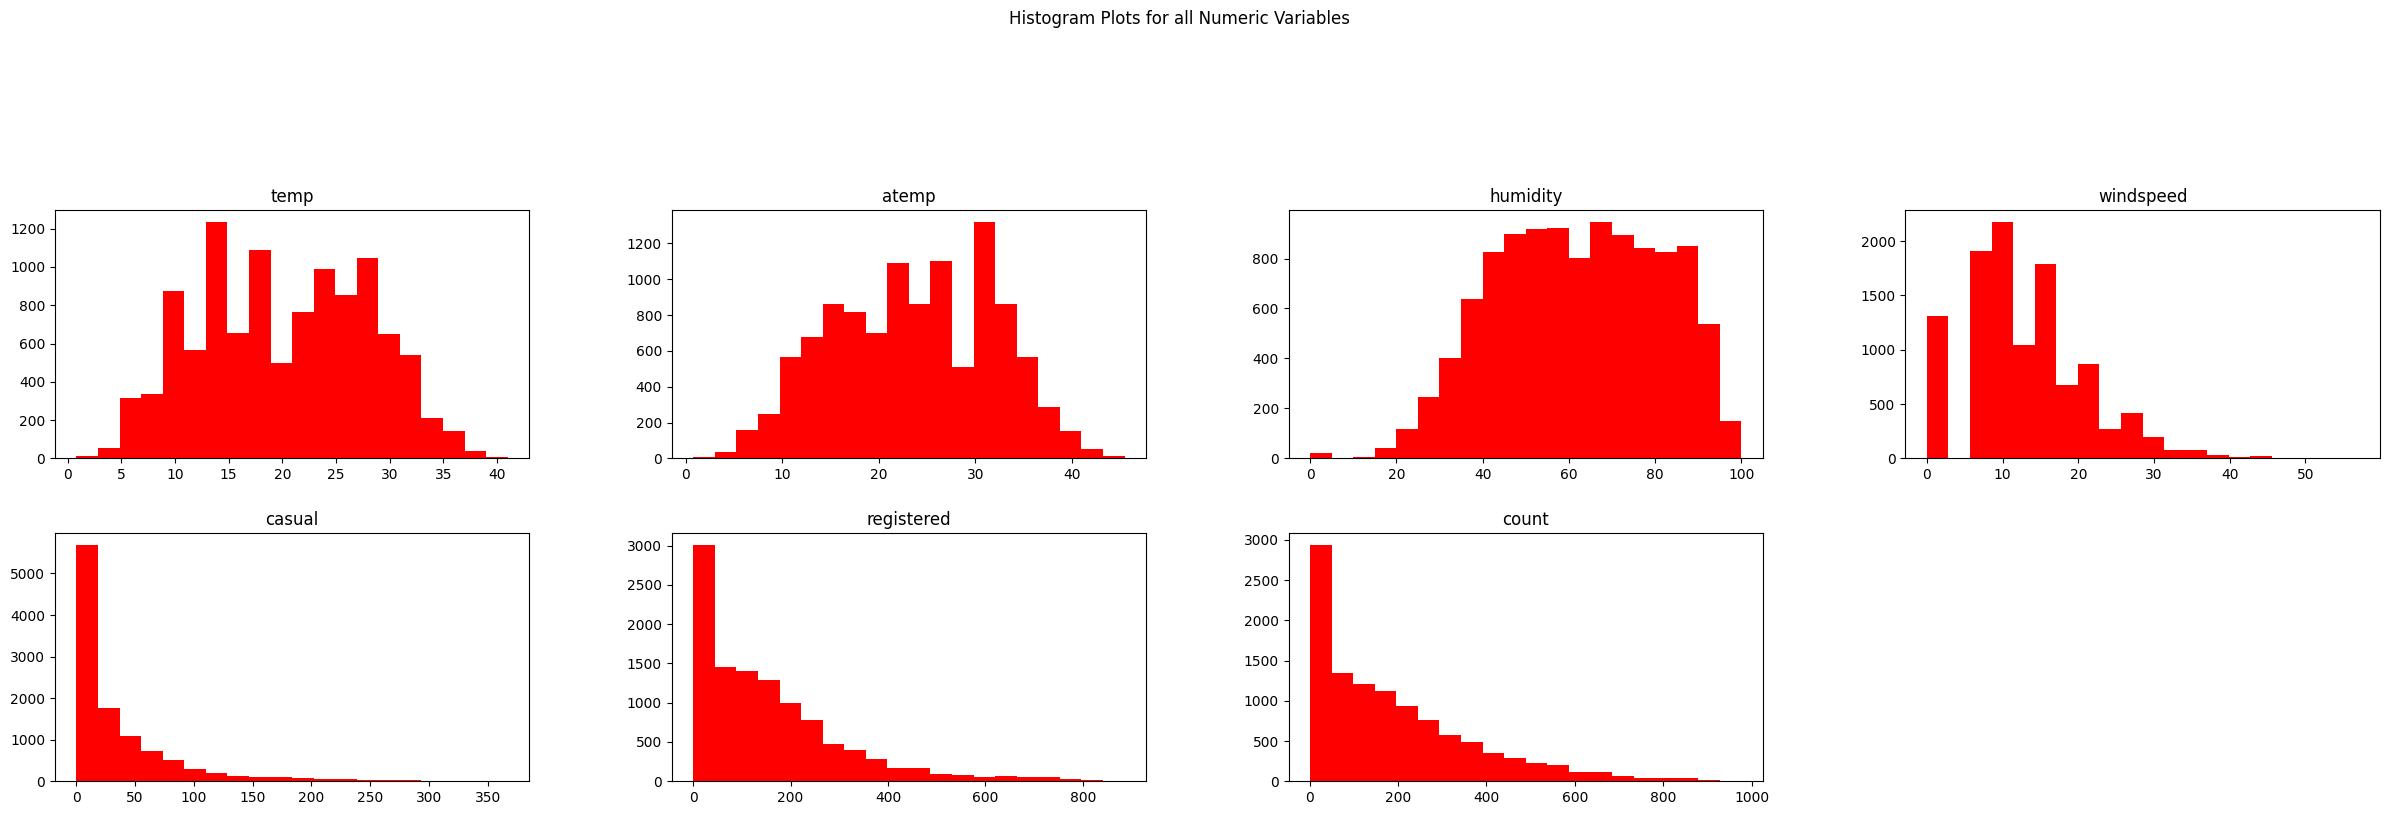

In [ ]:
yulu_cont = yulu[['temp','atemp','humidity','windspeed','casual','registered','count']]
yulu_cont.hist(layout = (5,4), color = 'r', figsize = (30,20), grid = False, bins = 20)
plt.suptitle('Histogram Plots for all Numeric Variables')
plt.show()

**Insights :**

We see from the above plot that the distribution of all the variables is skewed and hence are not normally distributed.

**2) Q-Q Plot**

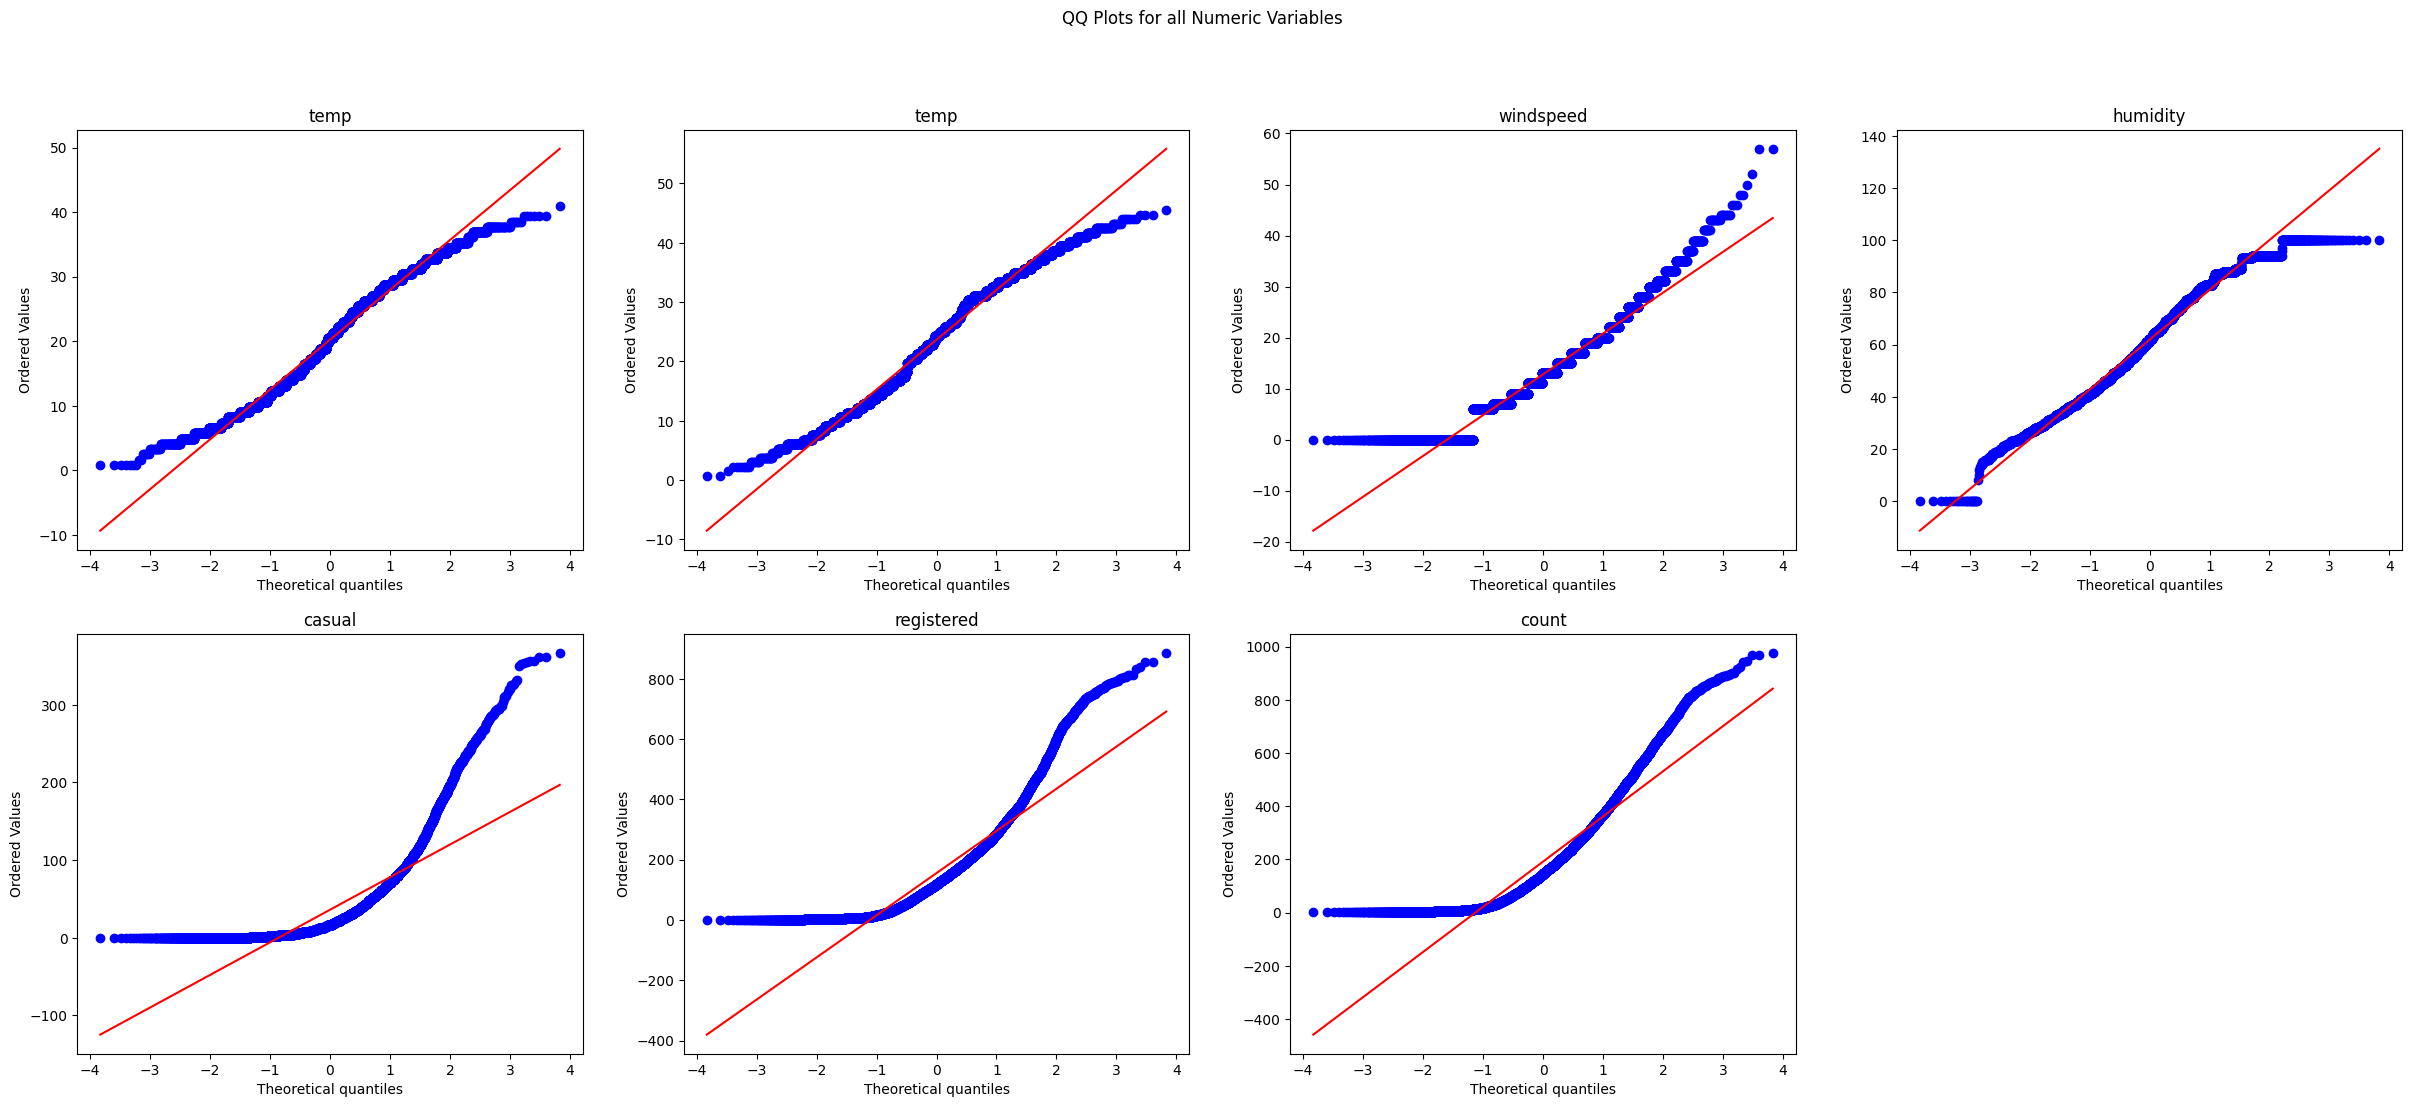

In [ ]:
plt.figure(figsize=(30,12))

ax1 = plt.subplot(241)
res = stats.probplot(yulu_cont['temp'], dist="norm", plot=plt)
ax1 = plt.title('temp')

ax2 = plt.subplot(242)
res = stats.probplot(yulu_cont['atemp'], dist="norm", plot=plt)
ax2 = plt.title('temp')

ax3 = plt.subplot(243)
res = stats.probplot(yulu_cont['windspeed'], dist="norm", plot=plt)
ax3 = plt.title('windspeed')

ax4 = plt.subplot(244)
res = stats.probplot(yulu_cont['humidity'], dist="norm", plot=plt)
ax4 = plt.title('humidity')

ax5 = plt.subplot(245)
res = stats.probplot(yulu_cont['casual'], dist="norm", plot=plt)
ax5 = plt.title('casual')

ax6 = plt.subplot(246)
res = stats.probplot(yulu_cont['registered'], dist="norm", plot=plt)
ax6 = plt.title('registered')

ax7 = plt.subplot(247)
res = stats.probplot(yulu_cont['count'], dist="norm", plot=plt)
ax7 = plt.title('count')

plt.suptitle('QQ Plots for all Numeric Variables')
plt.show()

**Insights :**

From the QQ-Plot we observe that none of the variables is looking straight, hence showing
deviation from normal distribution.

**3) Levene's Test**

**i) Levene's Test for equality of variance for number of riders for 4 different seasons**

**Assumption :**
* Samples collected from the population are independent of each other
* The population data is approximately normal in distribution

**Setting up Hypothesis Framework**

* **Ho:** Variance is equal for all seasons
* **H1:** Variance is not equal for all seasons (atleast one of the season has a variance different from the others)
* **Significance Level(alpha):** 0.05 or 5%
* **Levene's Test-Statistic:** As the data for all the seasons is skewed in distribution, we will use the median for test statistics.

In [ ]:
l_stat,p_value = stats.levene(weather_clear, weather_partly_clear, weather_rain, center ='median')
print("l_stat : ",l_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Variance is not equal for all seasons (atleast one of the season has a variance different from the others)")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Variance is equal for all seasons")

l_stat :  81.67574924435011
p_value :  6.198278710731511e-36
Interpretation : Reject Ho
Conclusion : Variance is not equal for all seasons (atleast one of the season has a variance different from the others)


**Insights :**
* Since, pvalue(6.198278710731511e-36) is lesser than Significance Level(α) i.e 0.05, we reject the
null hypothesis that - Variance is equal for all seasons
* This implies that at 95% confidence level, Variance is not equal for all seasons, atleast one of
the season has a variance different from the others

**ii) Levene's Test for equality of variance for number of riders for 4 different weather**

**Assumption :**
* Samples collected from the population are independent of each other
* The population data is approximately normal in distribution

**Setting up Hypothesis Framework**
* **Ho:** Variance is equal for all weathers
* **H1:** Variance is not equal for all weathers (atleast one of the weather has a variance different from the others)
* **Significance Level(alpha):** 0.05 or 5%
* **Levene's Test-Statistic:** As the data for all the weathers is skewed in distribution, we will use the median for test statistics.

In [ ]:
l_stat,p_value = stats.levene(season_spring, season_summer, season_fall, season_winter, center ='median')
print("l_stat : ",l_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Variance is not equal for all weather (atleast one of the season has a variance different from the others)")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Variance is equal for all weather")


l_stat :  187.7706624026276
p_value :  1.0147116860043298e-118
Interpretation : Reject Ho
Conclusion : Variance is not equal for all weather (atleast one of the season has a variance different from the others)


**Insight :**
* Since, pvalue(1.0147116860043298e-118) is lesser than Significance Level(α) i.e 0.05, we reject the
null hypothesis that - Variance is equal for all weathers
* This implies that at 95% confidence level, Variance is not equal for all weathers, atleast one of
the weather has a variance different from the others.

**iii) Levene's Test for equality of variance for number of riders as per working day**

**Assumption:**
* Samples collected from the population are independent of each other
* The population data is approximately normal in distribution

**Setting up Hypothesis Framework**
* **Ho:** Variance is equal irrespective of working day or not
* **H1:** Variance is not equal irrespective of working day or not
**Significance Level(alpha):** 0.05 or 5%
**Levene's Test-Statistic:** As the data for workingday or not is skewed in distribution, we will use the median for test statistics.

In [ ]:
l_stat,p_value = stats.levene(working_day_no, working_day_yes, center ='median')
print("l_stat : ",l_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Variance is not equal irrespective of working day or not.")
else :
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Variance is equal irrespective of working day or not.")

l_stat :  0.004972848886504472
p_value :  0.9437823280916695
Interpretation : Fail to Reject Ho
Conclusion : Variance is equal irrespective of working day or not.


**Insights :**
* Since, pvalue(0.9437823280916695) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - Variance is equal irrespective of whether it is a working day
or not.
* This implies that at 95% confidence level, Variance is equal irrespective of whether it is a working day or not.

**iv) Levene's Test for equality of variance for number of riders as per holiday**

**Assumption :**
* Samples collected from the population are independent of each other
* The population data is approximately normal in distribution

**Setting up Hypothesis Framework**
* **Ho** Variance is equal irrespective of holiday or not
* **H1:** Variance is not equal irrespective of holiday or not
* **Significance Level(alpha):** 0.05 or 5%
* **Levene's Test-Statistic:** As the data for holiday is skewed in distribution, we will use the median for test statistics.

In [ ]:
l_stat,p_value = stats.levene(np.array(yulu[yulu.holiday == 'no']['count']), np.array(yulu[yulu.holiday == 'yes']['count']), center ='median')
print("l_stat : ",l_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Variance is not equal irrespective of holiday or not.")
else :
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Variance is equal irrespective of holiday or not.")

l_stat :  1.222306875221986e-06
p_value :  0.9991178954732041
Interpretation : Fail to Reject Ho
Conclusion : Variance is equal irrespective of holiday or not.


**Insights :**
* Since, pvalue(0.9991178954732041) is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that - Variance is equal irrespective of whether it is a holiday or not.
* This implies that at 95% confidence level, Variance is equal irrespective of whether it is a holiday or not.

**4) Shapiro-Wilk Test**

Shapiro-Wilk Test is used to test Normality.

**Assumption:**
* The sample is coming from a normal distribution

**Setting up Hypothesis Framework**
* **Ho:** Sample comes from a normal distribution
* **H1:** Sample is not coming from a population which is normally distributed
* **Significance Level(alpha):** 0.05 or 5%

In [ ]:
print("\033[1m Insights: \033[0m")
print(end = "\n")

for i in list(yulu_cont.columns):

  test_statistic, p_value = stats.shapiro(yulu_cont[i])

  print("="*50)

  print(f"The test-statistic for \033[1m {i} \033[0m is \033[1m {test_statistic} \033[0m with \033[1m p_value {p_value} \033[0m")

  if p_value > 0.05:

    print("Hence at 95% confidence level, we fail to reject null hypothesis")
    print(f"Hence we can say that \033[1m {i} is coming from normally distributed population \033[0m")

  else:
    print("Hence at 95% confidence level, we reject null hypothesis")
    print(f"Hence we can say that \033[1m {i} is not coming from normally distributed population \033[0m")

  print("="*50)
  print(end = "\n")


 Insights: 

The test-statistic for  temp  is  0.9804227352142334  with  p_value 4.577117001754969e-36 
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that  temp is not coming from normally distributed population 

The test-statistic for  atemp  is  0.9815532565116882  with  p_value 3.35599504562436e-35 
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that  atemp is not coming from normally distributed population 

The test-statistic for  humidity  is  0.9822683930397034  with  p_value 1.244270413072488e-34 
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that  humidity is not coming from normally distributed population 

The test-statistic for  windspeed  is  0.958724856376648  with  p_value 0.0 
Hence at 95% confidence level, we reject null hypothesis
Hence we can say that  windspeed is not coming from normally distributed population 

The test-statistic for  casual  is  0.7056366205215454  with  p_value 0

#**Insight :**

**1)** Most of the rides are booked during office closing and opening hours

**2)** The number of casual, registered and total riders has increased considerably between 1st Jan 2011 to 19th Dec 2012.

**3)** The number of riders in all seasons is almost the same

**4)** More number of riders (97% of them) ride on non-holidays as compaired to holidays.

**5)** Nearly 92% of the riders ride on days when the weather is clear or partly clear.

**6)** There is also a definite trend and seasonality as we can see increase in number of riders from spring to summer to fall and then a decrease in the number of riders in winter before rising again in spring next season.

**7)** The median number of casual, registered and total riders is highest in fall and summer season followed by winter and spring season.

**8)** The median number of casual, registered and total riders is almost equal irrespective of whether it is a holiday or working day.

**9)** The median number of casual, registered and total riders is highest when the weather is clear, followed by the number of casual, registered and total riders when the weather is partly_clear.

**10)** There is a very less correlation between {temperature, feeling temperature, humidity and windspeed} and {casual, registered and count} variables.

**11)** There is a very strong correlation between temperature and feeling temperature.

**12)** The mean of number of riders in different seasons is statistically different for atleast one season

**13)** The mean of number of riders in different weather is statistically different for atleast one weather

**14)** Variance is not equal for all seasons and weather, atleast one of the season and weather has a variance different from the others

**15)** Variance is equal irrespective of whether it is a working day or holiday

**16)** From the QQ-Plot and Shapiro-Wilk Test we observe that none of the variables are following normal distribution

#**Recommendations :**

**1)** Most of the rides are booked during office closing and opening hours. Hence most of our target audience is Working Class. So Yulu should provide offers or Tie-up with some organizations to promote their product to the working class.

**2)** Least of the rides are booked during night 1am to 4am, hence yulu can charged their e-bikes on that time to ensure avilibility at the pick time.

**3)** As from **2 Sample T-test** we have seen that holiday has no impact on the number of riders at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective of whether it is a holiday or working day.

**4)** As we have seen from **Analysis of Variance(ANOVA)**, that mean number of riders is statistically different at 95% confidence level for different seasons, Yulu should have different strategies for different seasons. Yulu should try to increase the riders in the months of fall and winter when the number of riders goes down considerably and maximize capacity utilization of e-bikes in the months of summer and fall.

**5)** As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically different at 95% confidence level for different weathers, Yulu should have different strategies for different weathers. Yulu should try to maximize the capacity utilization of e-bikes when the weather is clear or partly clear.

**6)** Yulu should perform demand forecasting as we have seen that there is trend and seasonality in the data. Better demand forecasting will lead to better capacity utilization of e-bikes in different seasons.

**7)** Yulu should also perform further investigation into the riders based on gender and age as insights into age bracket and gender would reveal a lot about the week on week capacity utilization on the type of customers preferring Yulu e-bikes.